ML Assignment 5

1.	You are expected to study impact of noise in R2, coefficient and their p-values in this assignment. You can fix the dataset size to 1000
2.	Generate a random variable using distribution of your choice. Call this as x. 
3.	Fix an intercept value b0 and chose a coefficient value b1
4.	Generate y’ = b1*x + b0
5.	Generate another random variable є which is normally distributed.  Fix its mean to be 0.  And keep changing values of std and perform following analysis 
    a.	Create a new y as y = y’ + є
    b.	Fit a linear regression model to predict y using x
    c.	Note down values of b1, b0 , their p-values and R2 and its p-value 
6.	Analyse impact of variance on quantities in 5. C

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

In [34]:
np.random.seed(42)
n = 1000
b0_true = 5
b1_true = 3


x = np.random.normal(10, 5, n)
X = x.reshape(-1, 1)

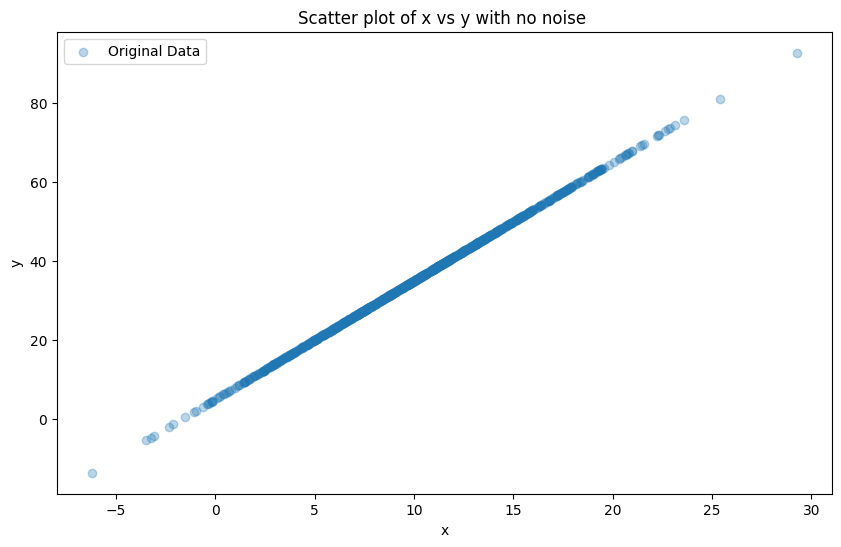

In [35]:

y_true = b1_true * x + b0_true

plt.figure(figsize=(10, 6))
plt.scatter(x, y_true, alpha=0.3, label='Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Scatter plot of x vs y with no noise ')
plt.legend()
plt.show()

# Different noise levels
std_values = [0,1,2,3,4, 5, 10, 20, 50, 100]

### 1.Formula For R^2  

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

### 2. p-value for b_0

$$
t_{b_0} = \frac{b_0}{SE(b_0)}
$$

$$
SE(b_0) = \sqrt{ \hat{\sigma}^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} \right) }
$$

$$
p\text{-value}(b_0) = 2 \cdot \left( 1 - T_{\text{cdf}}\big(|t_{b_0}|, \; df = n-2\big) \right)
$$



### 3. Compute p-value of b_1

$$
t_{b_1} = \frac{b_1}{SE(b_1)}
$$

$$
SE(b_1) = \sqrt{ \frac{\hat{\sigma}^2}{\sum_{i=1}^n (x_i - \bar{x})^2} }
$$

$$
p\text{-value}(b_1) = 2 \cdot \left(1 - T_{\text{cdf}}\big(|t_{b_1}|, \; df = n-2\big)\right)
$$





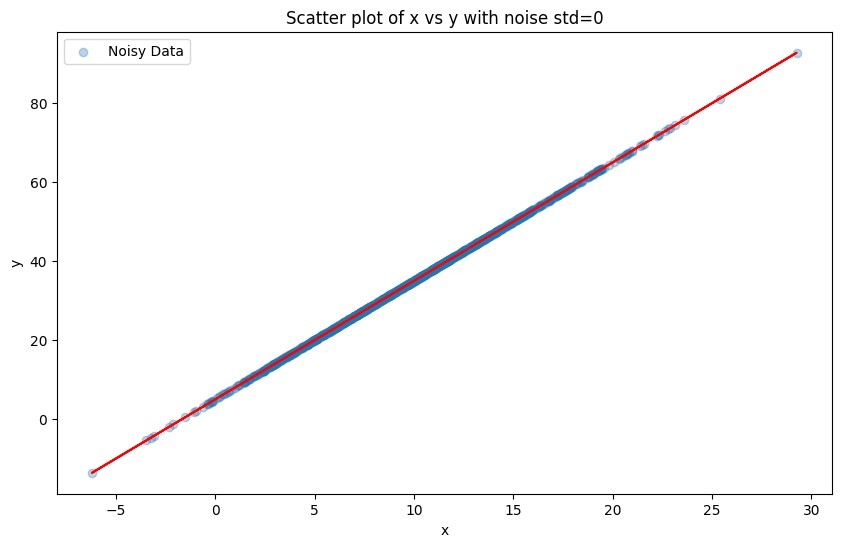

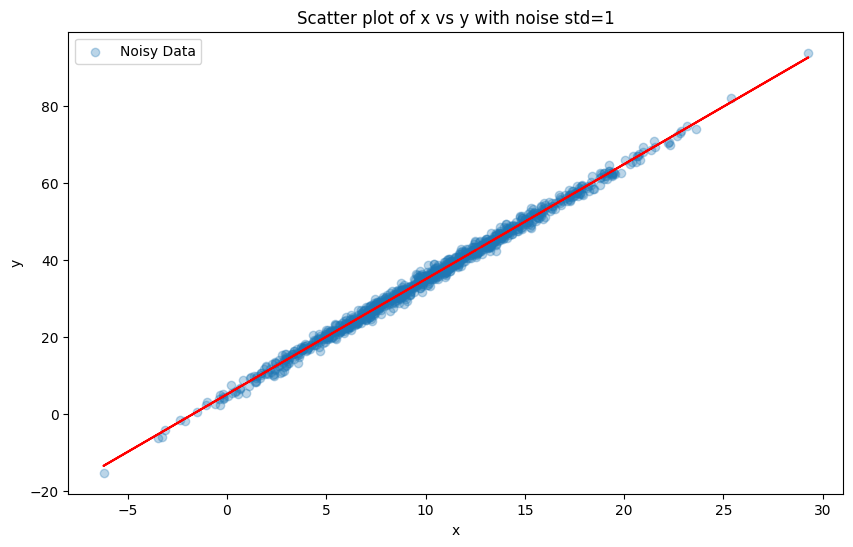

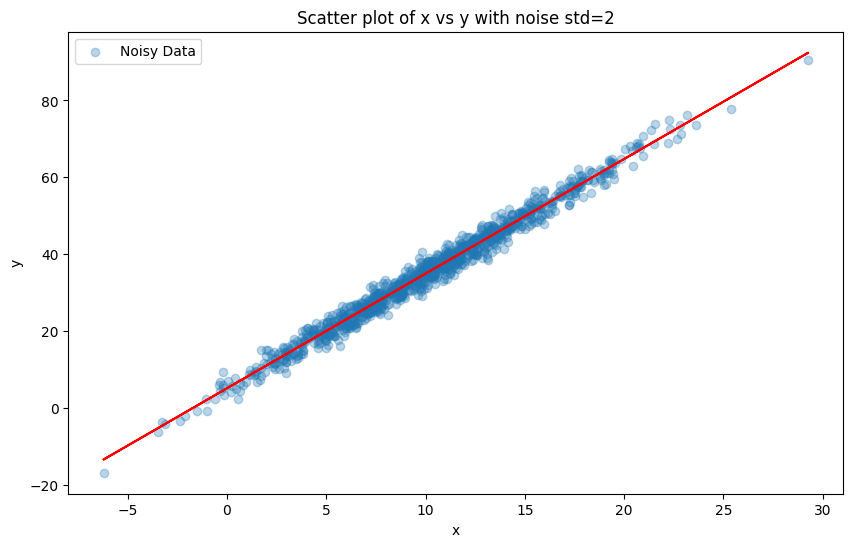

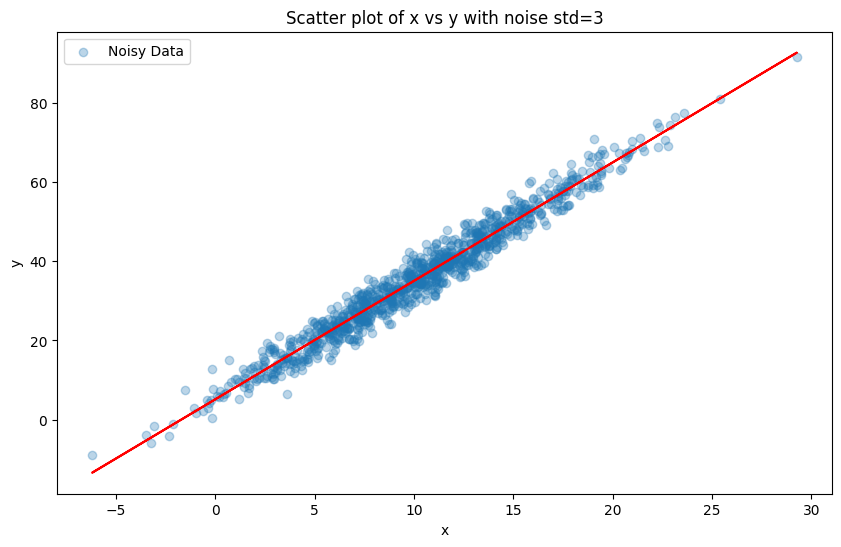

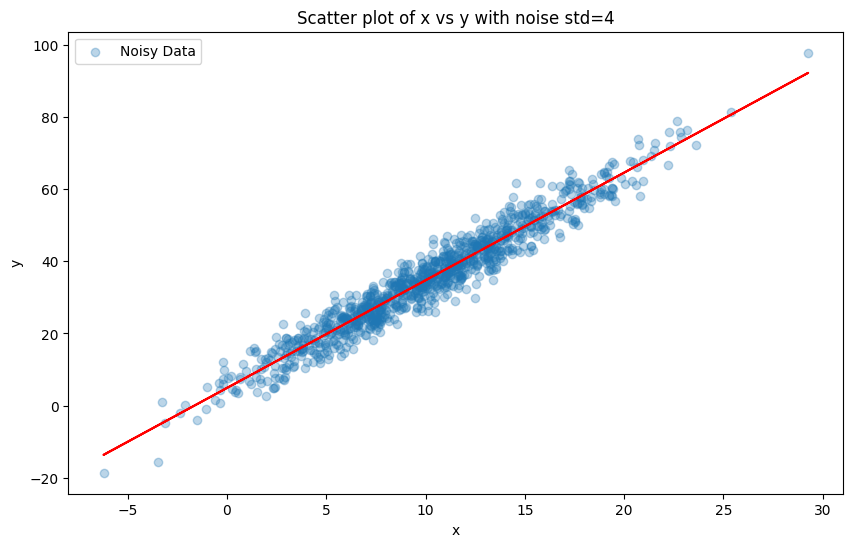

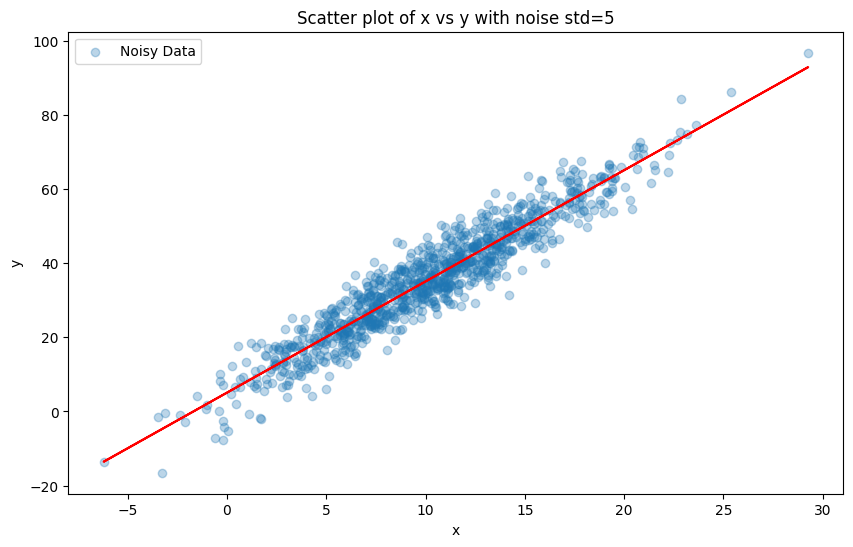

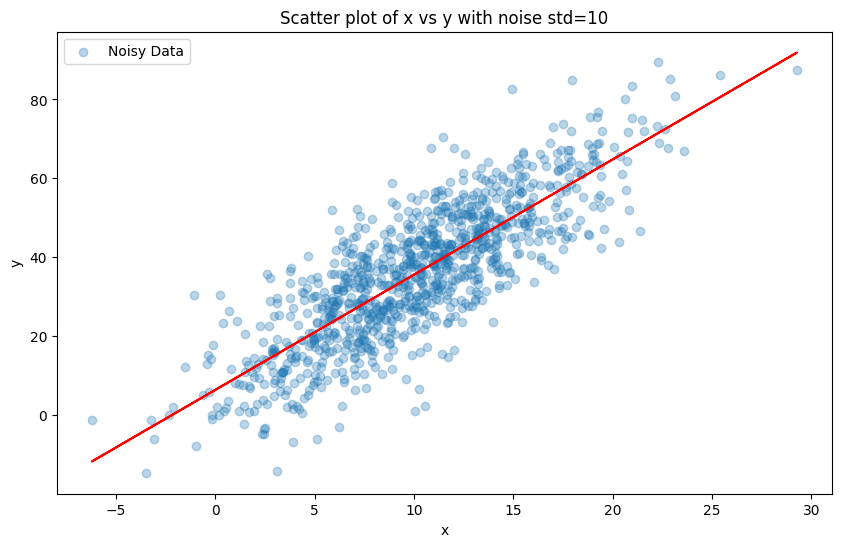

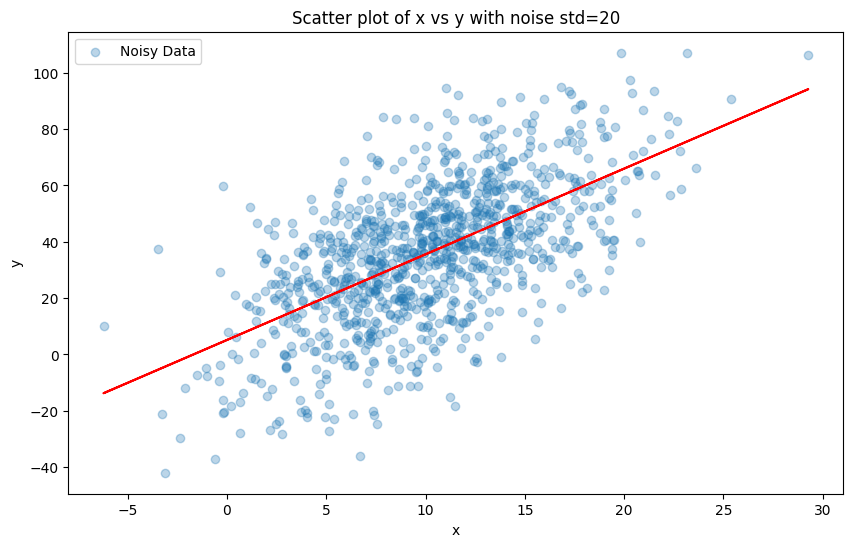

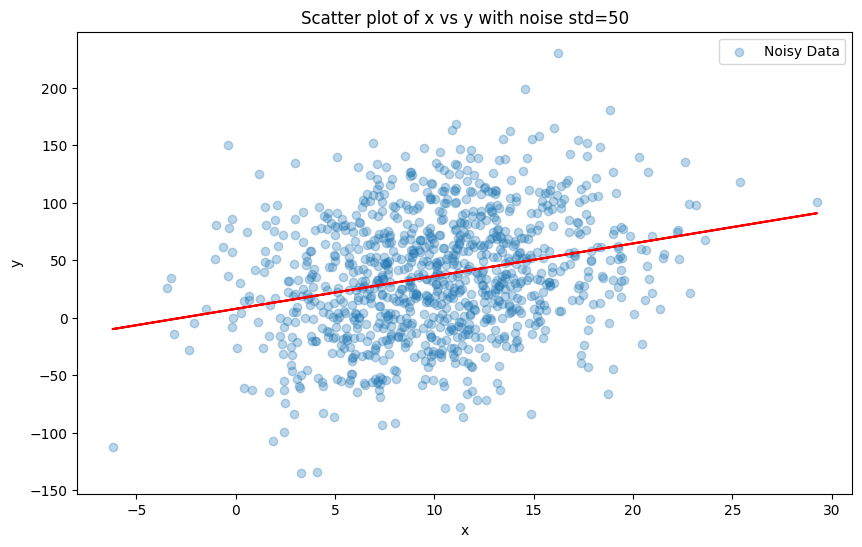

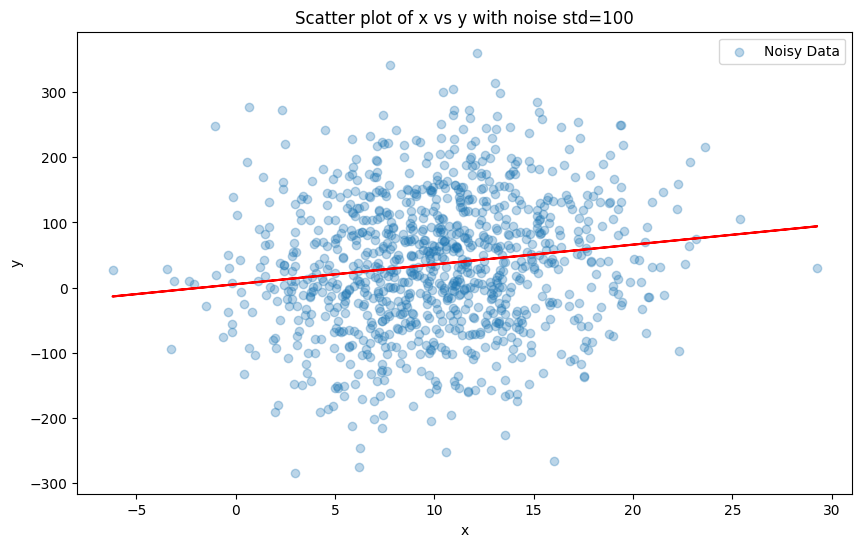

In [48]:
results = []

for std in std_values:
    # 4. Add noise
    epsilon = np.random.normal(0, std, n)
    y = y_true + epsilon


    
    # 5. Fit Linear Regression
    model = LinearRegression().fit(X, y)
    b1_est = model.coef_[0]
    b0_est = model.intercept_
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.3, label='Noisy Data')
    plt.plot(x,y_pred,color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Scatter plot of x vs y with noise std={std}')
    plt.legend()
    plt.show()

    # --- Compute R^2 ---
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot

    # --- Compute standard error of coefficients and p-values ---
    n_samples = len(y)
    dof = n_samples - 2  # degrees of freedom
    residual_std = np.sqrt(ss_res / dof)

    # For slope (b1)
    se_b1 = residual_std / np.sqrt(np.sum((x - np.mean(x))**2))
    t_b1 = b1_est / se_b1
    p_b1 = 2 * (1 - stats.t.cdf(abs(t_b1), df=dof))

    # For intercept (b0)
    se_b0 = residual_std * np.sqrt(1/n_samples + (np.mean(x)**2) / np.sum((x - np.mean(x))**2))
    t_b0 = b0_est / se_b0
    p_b0 = 2 * (1 - stats.t.cdf(abs(t_b0), df=dof))

 

    results.append({
        "Noise Std": std,
        "Estimated b0": b0_est,
        "Estimated b1": b1_est,
        "p-value b0": p_b0,
        "p-value b1": p_b1,
        "R^2": r2,
    })


In [37]:
df_results = pd.DataFrame(results)
print(df_results)

   Noise Std  Estimated b0  Estimated b1    p-value b0  p-value b1       R^2
0          0      5.000000      3.000000  0.000000e+00    0.000000  1.000000
1          1      4.960955      3.004445  0.000000e+00    0.000000  0.995552
2          2      5.018994      2.994411  0.000000e+00    0.000000  0.980748
3          3      5.043960      2.981006  0.000000e+00    0.000000  0.960092
4          4      4.860609      2.995290  0.000000e+00    0.000000  0.929803
5          5      5.206570      2.965597  0.000000e+00    0.000000  0.889322
6         10      4.226581      3.095635  2.790796e-08    0.000000  0.679598
7         20      6.058863      2.931460  3.956348e-05    0.000000  0.334800
8         50      2.200037      3.217721  5.297295e-01    0.000000  0.096360
9        100      2.498045      2.852536  7.227568e-01    0.000006  0.020294


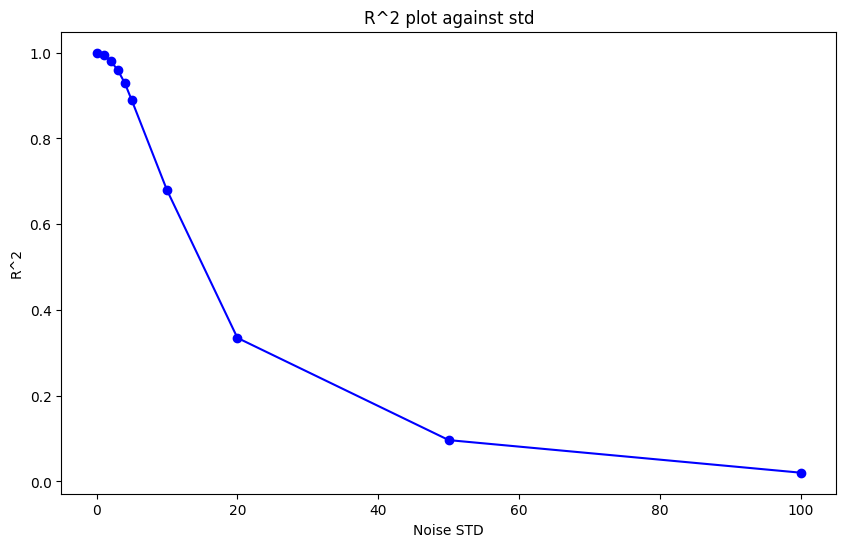

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df_results["Noise Std"], df_results["R^2"], marker='o',color='b')
plt.xlabel("Noise STD")
plt.ylabel("R^2")
plt.title("R^2 plot against std")
plt.show()

* **Low noise (std=1, 5):**

  * R² ≈ 0.99 or 0.90 → regression fits almost perfectly.
  * The line captures the true relationship $y = 3x + 5$.

* **Medium noise (std=10, 20):**

  * R² drops (≈ 0.66 → 0.33).
  * Regression still finds the correct slope, but noise hides part of the pattern.

* **High noise (std=50, 100):**

  * R² becomes very low (≈ 0.07 or lower).
  * Regression barely explains variance in $y$.
  * The data looks like random scatter, the relationship almost disappears.

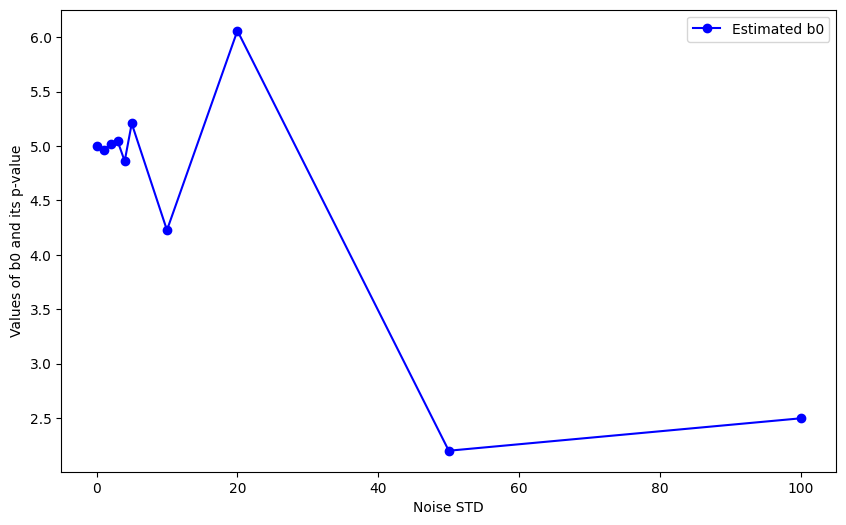

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df_results["Noise Std"], df_results["Estimated b0"], marker='o',color='b')
plt.xlabel("Noise STD")
plt.ylabel("Values of b0 and its p-value")
plt.title("")
plt.legend(["Estimated b0","p-value b0"])
plt.show()

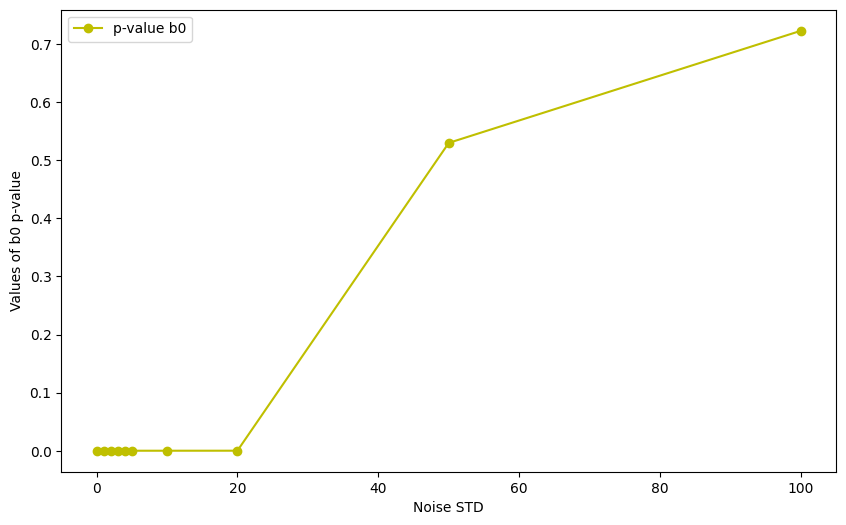

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df_results["Noise Std"], df_results["p-value b0"], marker='o',color='y')
plt.xlabel("Noise STD")
plt.ylabel("Values of b0 p-value")
plt.title("")
plt.legend(["p-value b0"])
plt.show()

* **Low noise (std=1, 5, 10):**

  * p-value of $b_0$ is extremely small ($\approx 0$, $10^{-11}$, etc.).
  * The intercept is **significant**, correctly detected near its true value (5).

* **Moderate noise (std=20):**

  * p-value rises (\~$2.4 \times 10^{-4}$, still < 0.05).
  * Intercept still significant, but confidence is weaker.

* **High noise (std=50, 100):**

  * p-value becomes very large (0.37, > 0.05).
  * Now we **cannot reject $H_0$** .
  * Noise destroys the model, so even though true intercept is 5, regression can’t prove it.



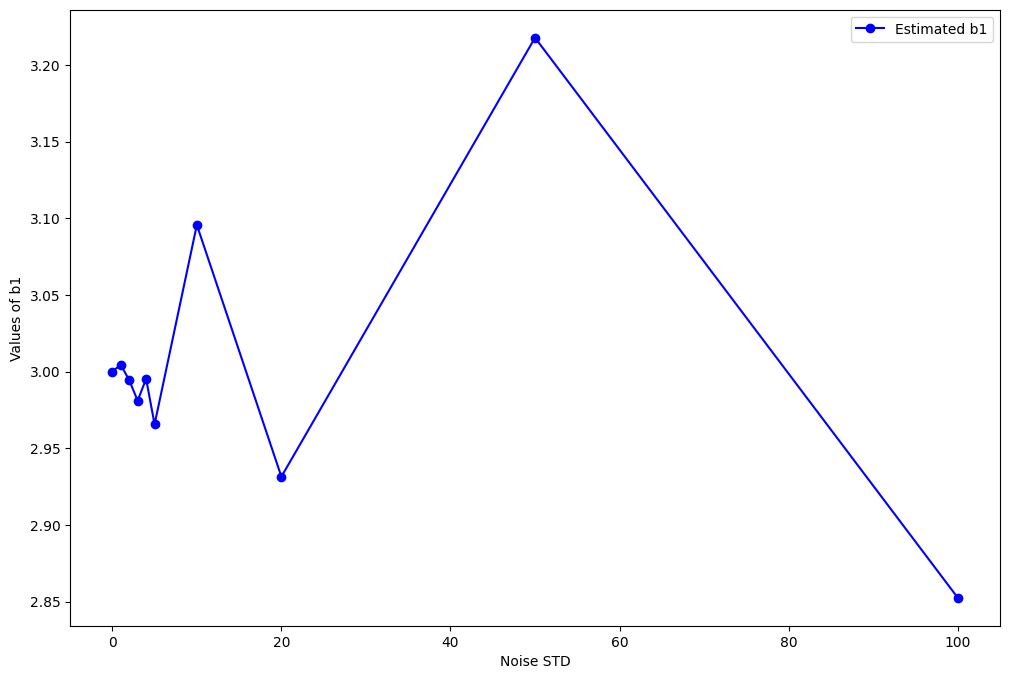

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(df_results["Noise Std"], df_results["Estimated b1"], marker='o',color='b')
# plt.plot(df_results["Noise Std"], df_results["p-value b1"], marker='o',color='y')
plt.xlabel("Noise STD")
plt.ylabel("Values of b1")
plt.title("")
plt.legend(["Estimated b1"])
plt.show()

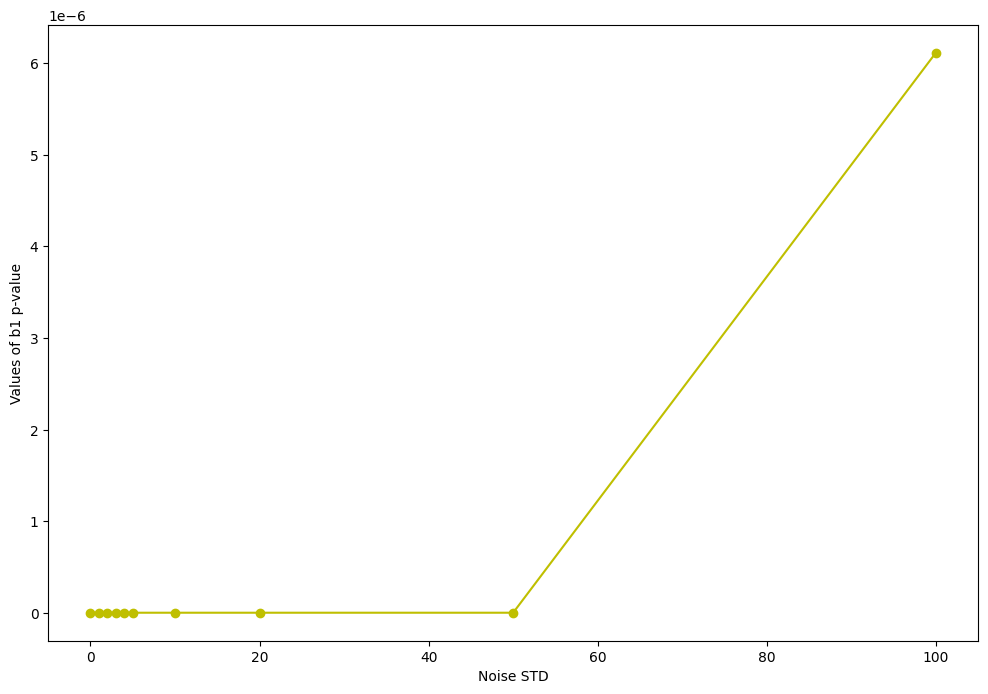

In [42]:
plt.figure(figsize=(12, 8))
# plt.plot(df_results["Noise Std"], df_results["Estimated b1"], marker='o',color='b')
plt.plot(df_results["Noise Std"], df_results["p-value b1"], marker='o',color='y')
plt.xlabel("Noise STD")
plt.ylabel("Values of b1 p-value")
plt.title("")
plt.show()